# SANBERCODE PYTHON - DATA SCIENCE : FINAL PROJECT

## 1 - Import Library

In [ ]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
from sklearn.preprocessing import StandardScaler
from sklearn.cluster import KMeans
from sklearn.metrics import silhouette_score

## 2 - Dataset Understanding

In [ ]:
# Import dataset
df = pd.read_csv('/content/Data_Negara_HELP.csv')
df

,Negara,Kematian_anak,Ekspor,Kesehatan,Impor,Pendapatan,Inflasi,Harapan_hidup,Jumlah_fertiliti,GDPperkapita
0,Afghanistan,90.2,10.0,7.58,44.9,1610,9.44,56.2,5.82,553
1,Albania,16.6,28.0,6.55,48.6,9930,4.49,76.3,1.65,4090
2,Algeria,27.3,38.4,4.17,31.4,12900,16.10,76.5,2.89,4460
3,Angola,119.0,62.3,2.85,42.9,5900,22.40,60.1,6.16,3530
4,Antigua and Barbuda,10.3,45.5,6.03,58.9,19100,1.44,76.8,2.13,12200
...,...,...,...,...,...,...,...,...,...,...
162,Vanuatu,29.2,46.6,5.25,52.7,2950,2.62,63.0,3.50,2970
163,Venezuela,17.1,28.5,4.91,17.6,16500,45.90,75.4,2.47,13500
164,Vietnam,23.3,72.0,6.84,80.2,4490,12.10,73.1,1.95,1310
165,Yemen,56.3,30.0,5.18,34.4,4480,23.60,67.5,4.67,1310


In [ ]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 167 entries, 0 to 166
Data columns (total 10 columns):
 #   Column            Non-Null Count  Dtype  
---  ------            --------------  -----  
 0   Negara            167 non-null    object 
 1   Kematian_anak     167 non-null    float64
 2   Ekspor            167 non-null    float64
 3   Kesehatan         167 non-null    float64
 4   Impor             167 non-null    float64
 5   Pendapatan        167 non-null    int64  
 6   Inflasi           167 non-null    float64
 7   Harapan_hidup     167 non-null    float64
 8   Jumlah_fertiliti  167 non-null    float64
 9   GDPperkapita      167 non-null    int64  
dtypes: float64(7), int64(2), object(1)
memory usage: 13.2+ KB


The dataset consists of 167 rows and 10 columns

## 3 - EDA Part 1

### Multivariate analysis by pairplot

<Figure size 432x288 with 0 Axes>

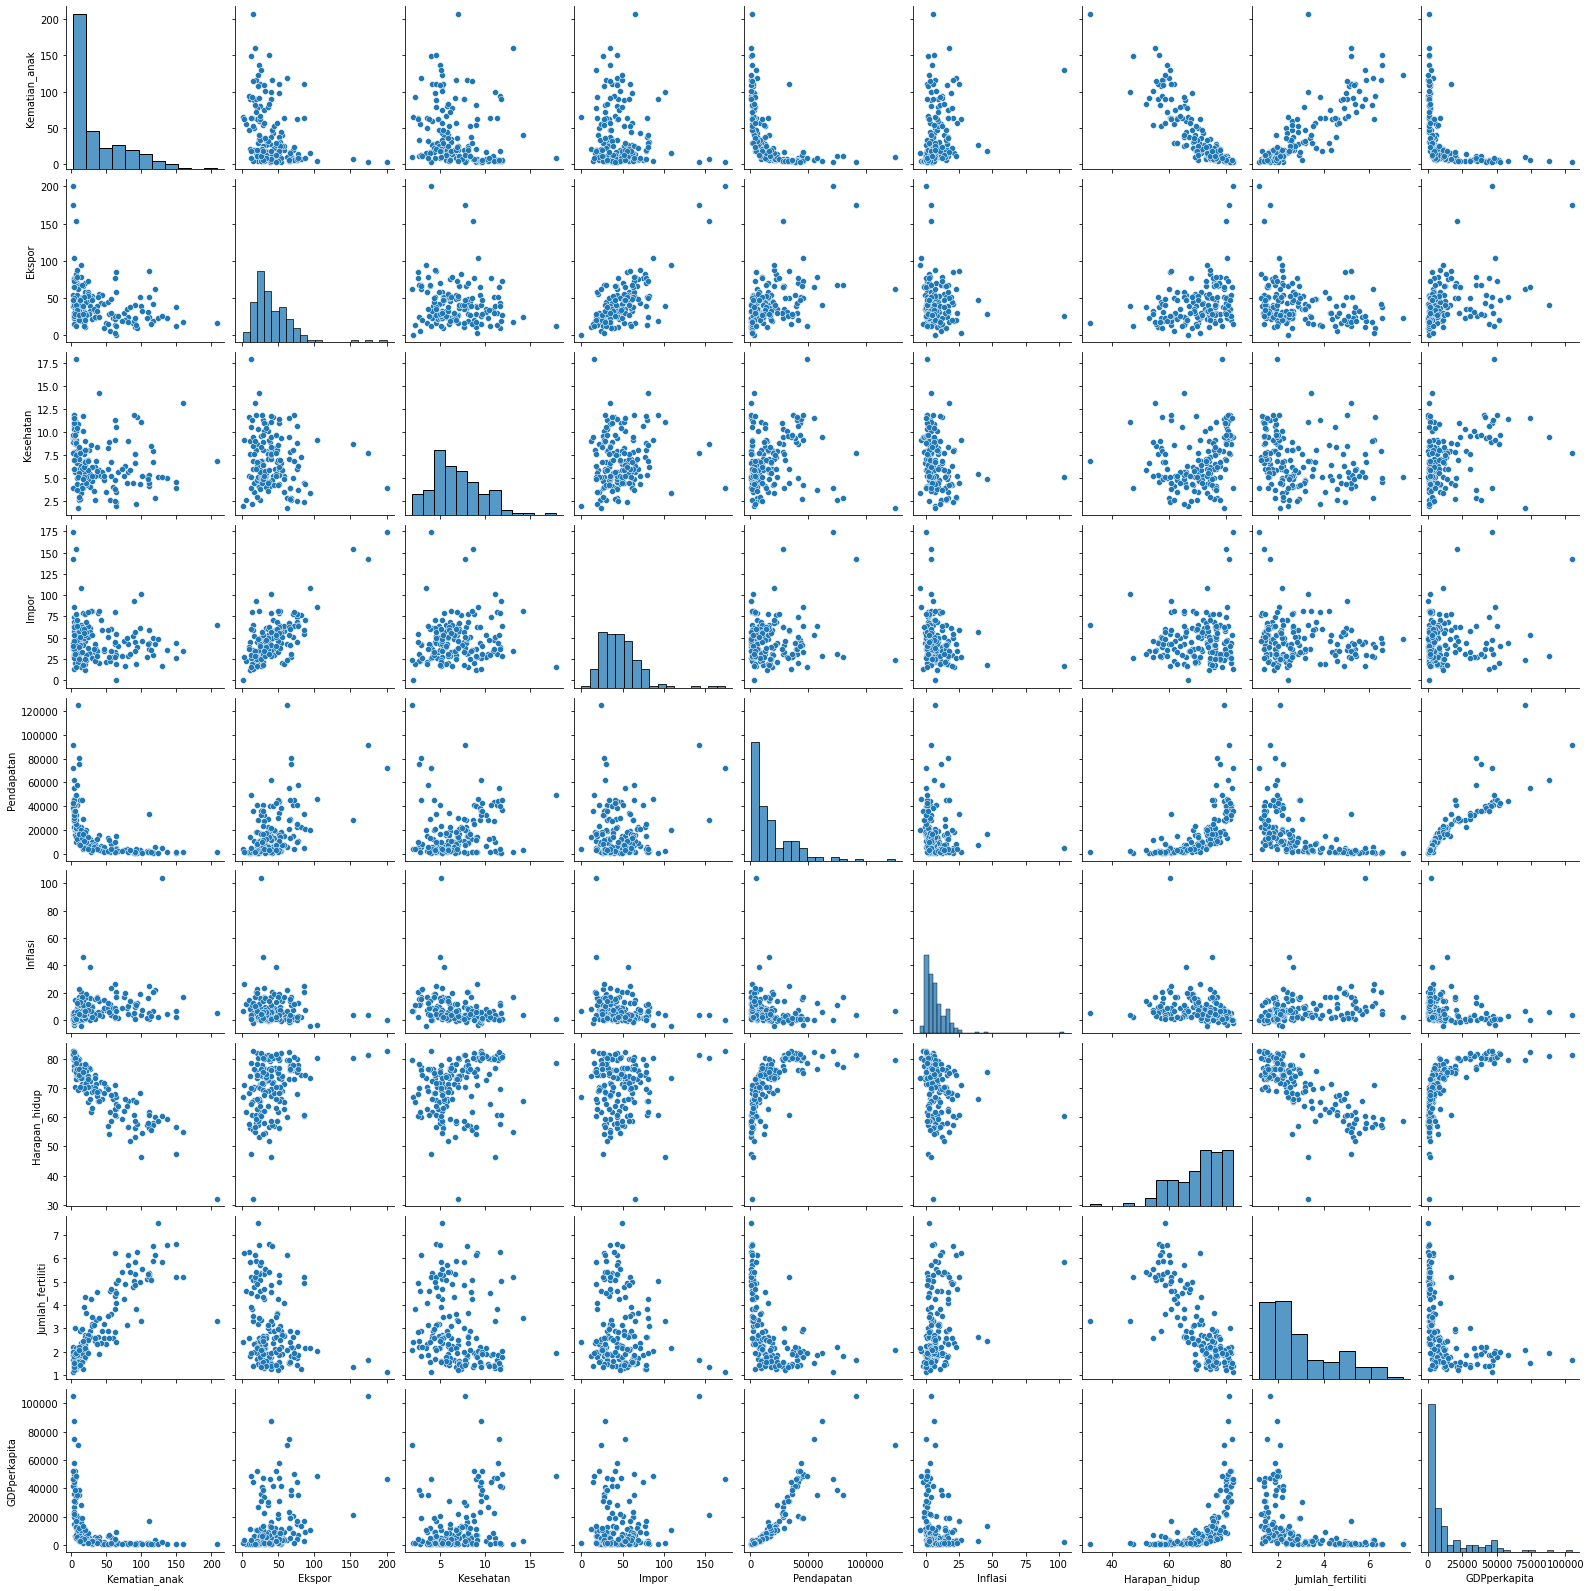

In [ ]:
# MULTIVARIATE ANALYSIS by pairplot
plt.figure()
sns.pairplot(df)
plt.show()

### Multivariate analysis by heatmap

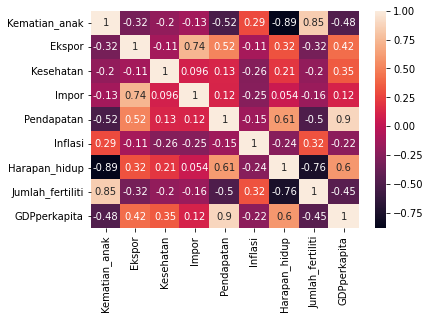

In [ ]:
# Multivariate analysis by heatmap
plt.figure()
sns.heatmap(df.corr(), annot=True)
plt.show()

The correlation score between variables, the closer the correlation score to 0 indicates the weaker correlation.
While the negative correlation score is a contrary relationship between two variables

## 4 - Feature Selection

According to correlation heatmap, the "Inflasi" and "Kematian_anak" features have a correlation score of 0.29.

These two features are sufficient to represent the socioeconomic and health of a country.
Therefore the two features of the dataset will be used as the basis for analysis and clustering.

### Data Cleaning

In [ ]:
# New dataframe contains columns "Inflasi" and "Kematian_anak" 

df_new = df[['Negara','Inflasi','Kematian_anak']]

#### Missing values

In [ ]:
# Checking missing values from df_new
df_new.isnull().sum()

Negara           0
Inflasi          0
Kematian_anak    0
dtype: int64

No missing values

#### Outliers

##### Cheking Outliers

/usr/local/lib/python3.7/dist-packages/seaborn/_decorators.py:43: FutureWarning: Pass the following variable as a keyword arg: x. From version 0.12, the only valid positional argument will be `data`, and passing other arguments without an explicit keyword will result in an error or misinterpretation.
  FutureWarning
/usr/local/lib/python3.7/dist-packages/seaborn/_decorators.py:43: FutureWarning: Pass the following variable as a keyword arg: x. From version 0.12, the only valid positional argument will be `data`, and passing other arguments without an explicit keyword will result in an error or misinterpretation.
  FutureWarning


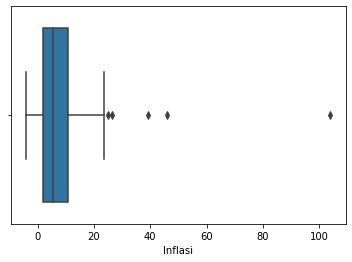

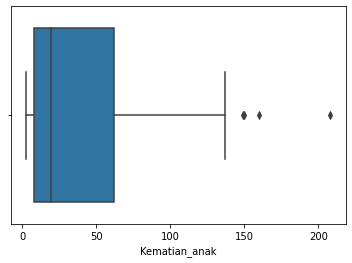

In [ ]:
# Cek Outliers from Inflasi
plt.figure()
sns.boxplot(df_new['Inflasi'])

# Cek Outliers from Kematian_anak
plt.figure()
sns.boxplot(df_new['Kematian_anak'])

There are outlier values in the "Inflasi" and "Kematian_anak" features.

##### Handling Outliers

/usr/local/lib/python3.7/dist-packages/pandas/core/generic.py:8870: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  return self._update_inplace(result)
/usr/local/lib/python3.7/dist-packages/seaborn/_decorators.py:43: FutureWarning: Pass the following variable as a keyword arg: x. From version 0.12, the only valid positional argument will be `data`, and passing other arguments without an explicit keyword will result in an error or misinterpretation.
  FutureWarning


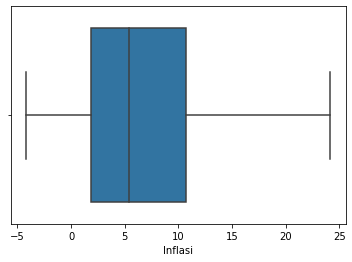

In [ ]:
# Handling outliers from Inflasi
Q1_i = df_new['Inflasi'].quantile(0.25) 
Q3_i = df_new['Inflasi'].quantile(0.75)
IQR_i = Q3_i - Q1_i

lower_bound_i = Q1_i - (1.5*IQR_i)
upper_bound_i = Q3_i + (1.5*IQR_i)

df_new['Inflasi'].mask((df_new['Inflasi'] > upper_bound_i), upper_bound_i, inplace=True)

# Rechecking after handling
plt.figure()
sns.boxplot(df_new['Inflasi'])

/usr/local/lib/python3.7/dist-packages/pandas/core/generic.py:8870: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  return self._update_inplace(result)
/usr/local/lib/python3.7/dist-packages/seaborn/_decorators.py:43: FutureWarning: Pass the following variable as a keyword arg: x. From version 0.12, the only valid positional argument will be `data`, and passing other arguments without an explicit keyword will result in an error or misinterpretation.
  FutureWarning


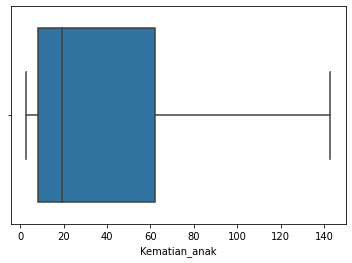

In [ ]:
# Handling outliers from Kematian_anak
Q1_k = df_new['Kematian_anak'].quantile(0.25)
Q3_k = df_new['Kematian_anak'].quantile(0.75)
IQR_k = Q3_k - Q1_k

lower_bound_k = Q1_k - (1.5*IQR_k)
upper_bound_k = Q3_k + (1.5*IQR_k)

df_new['Kematian_anak'].mask((df_new['Kematian_anak'] > upper_bound_k), upper_bound_k, inplace=True)

# Recheking after handling
plt.figure()
sns.boxplot(df_new['Kematian_anak'])

## 5 - EDA Part 2

### Univariate analysis

/usr/local/lib/python3.7/dist-packages/ipykernel_launcher.py:10: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  # Remove the CWD from sys.path while we load stuff.


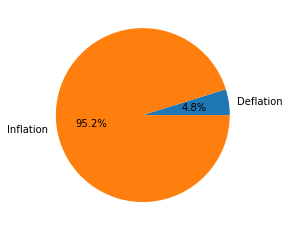

In [ ]:
# List of conditions
conditions = [
    (df_new['Inflasi'] < 0),
    (df_new['Inflasi'] == 0),
    (df_new['Inflasi'] > 0)
    ]
# List of values
values = ['Deflation', 'Zero Inflation', 'Inflation']

df_new['Category'] = np.select(conditions, values)

df_uni=df_new.groupby(['Category']).count()

plt.pie(df_uni['Inflasi'], labels=df_uni.index, autopct='%1.1f%%')
plt.show()

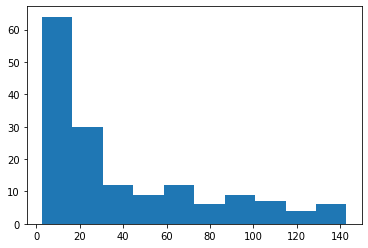

In [ ]:
df_hist=df_new[(df_new['Category'] == 'Inflation')]
plt.figure()
plt.hist(df_hist['Kematian_anak'])
plt.show()

### Bivariate analysis

Text(0.5, 0, 'Kematian_anak')

<Figure size 432x288 with 0 Axes>

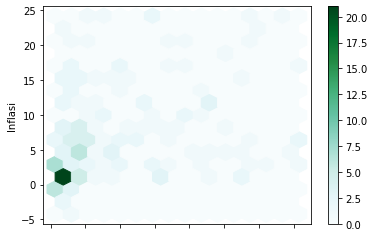

In [ ]:
plt.figure()
df_new.plot.hexbin(x='Kematian_anak', y='Inflasi', gridsize=15)
plt.xlabel('Kematian_anak')

## 6 - Clustering

### Data Scaling

In [ ]:
sc = StandardScaler()
scaled = sc.fit_transform(df_new[['Inflasi','Kematian_anak']].astype(float))
scaled_df = pd.DataFrame(data = scaled, columns = ['Inflasi','Kematian_anak'])
scaled_df

,Inflasi,Kematian_anak
0,0.355270,1.369802
1,-0.385208,-0.550464
2,1.351551,-0.271295
3,2.293979,2.121210
4,-0.841463,-0.714835
...,...,...
162,-0.664945,-0.221723
163,2.557260,-0.537419
164,0.753184,-0.375657
165,2.473489,0.485332


### Decide The Number of Clusters

#### a. Elbow method

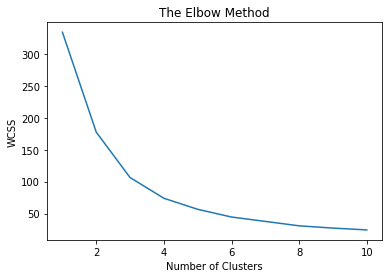

In [ ]:
wcss = []
for k in range(1,11):
  kmeans = KMeans(n_clusters = k,init='k-means++', random_state=42)
  kmeans.fit(scaled_df)
  wcss.append(kmeans.inertia_)
plt.plot(range(1,11),wcss)
plt.title('The Elbow Method')
plt.xlabel('Number of Clusters')
plt.ylabel('WCSS')
plt.show()

#### b. Silhouette score method

Text(0, 0.5, 'Silhouette Score')

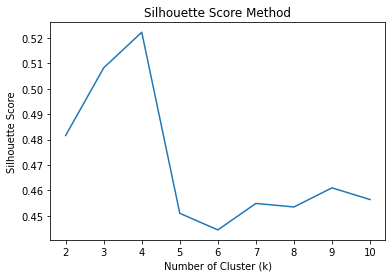

In [ ]:
data = []
k_list = []

for k in range(2, 11):
    kmeans = KMeans(n_clusters = k,init='k-means++', random_state=42).fit(scaled_df)
    labels = kmeans.labels_
    data.append(silhouette_score(scaled_df, labels, metric = 'euclidean'))
    k_list.append(k)

plt.plot(k_list,data)
plt.title('Silhouette Score Method')
plt.xlabel('Number of Cluster (k)')
plt.ylabel('Silhouette Score')

According to the Elbow method and Silhoutte score, the best number of cluster is "3"

### Clustering Result

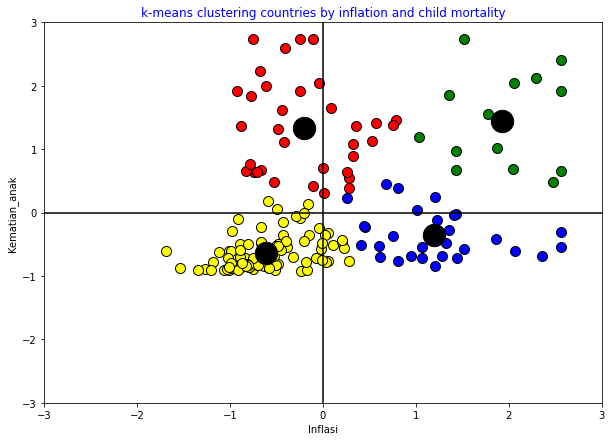

In [ ]:
kmeans1 = KMeans(n_clusters=4, random_state=42).fit(scaled)
labels1 = kmeans1.labels_
scaled_df['label_kmeans1'] = labels1

plt.figure(figsize=(10,7))
plt.scatter(scaled_df.Inflasi[scaled_df.label_kmeans1 == 0], scaled_df['Kematian_anak'][scaled_df.label_kmeans1 == 0], c='blue', s=100, edgecolors='black', linestyle='-')
plt.scatter(scaled_df.Inflasi[scaled_df.label_kmeans1 == 1], scaled_df['Kematian_anak'][scaled_df.label_kmeans1 == 1], c='red', s=100, edgecolors='black', linestyle='-')
plt.scatter(scaled_df.Inflasi[scaled_df.label_kmeans1 == 2], scaled_df['Kematian_anak'][scaled_df.label_kmeans1 == 2], c='yellow', s=100, edgecolors='black', linestyle='-')
plt.scatter(scaled_df.Inflasi[scaled_df.label_kmeans1 == 3], scaled_df['Kematian_anak'][scaled_df.label_kmeans1 == 3], c='green', s=100, edgecolors='black', linestyle='-')

plt.axhline(c='black')
plt.axvline(c='black')

centers1 = kmeans1.cluster_centers_
plt.scatter(centers1[:, 0], centers1[:, 1], c='black', s=500);
plt.xlabel('Inflasi')
plt.ylabel('Kematian_anak')
plt.xlim(xmin=-3, xmax=3)
plt.ylim(ymin=-3, ymax=3)
plt.title('k-means clustering countries by inflation and child mortality', loc='center', c='blue')
plt.show()


## Recommendation

### List of Countries in green cluster

In [ ]:
new = scaled_df.assign(Negara=df_new['Negara'],
                       OR_Inflasi=df_new['Inflasi'],
                       OR_Kematian_anak=df_new['Kematian_anak'])

filter_df=new[new.label_kmeans1 == 3].sort_values(by=['Kematian_anak','Inflasi'], ascending=False).drop(['Inflasi','Kematian_anak','label_kmeans1'], axis=1).rename(columns={"OR_Inflasi":"Inflasi", "OR_Kematian_anak":"Kematian_anak"})
filter_df

,Negara,Inflasi,Kematian_anak
132,Sierra Leone,17.20,142.875
113,Nigeria,24.16,130.000
3,Angola,22.40,119.000
37,"Congo, Dem. Rep.",20.80,116.000
49,Equatorial Guinea,24.16,111.000
63,Guinea,16.10,109.000
99,Mauritania,18.90,97.400
166,Zambia,14.00,83.100
142,Sudan,19.60,76.700
59,Ghana,16.60,74.700


### List of Countries with low "GDPperkapita"

In [ ]:
df_GDP = df[['Negara','Pendapatan','GDPperkapita']].sort_values(by='GDPperkapita').head()

df_GDP.set_index('Negara')

,Pendapatan,GDPperkapita
Negara,,
Burundi,764,231
Liberia,700,327
"Congo, Dem. Rep.",609,334
Niger,814,348
Sierra Leone,1220,399


### Recommended Countries

In [ ]:
rec = filter_df.merge(df_GDP, how='inner', on='Negara')
rec.set_index("Negara")

,Inflasi,Kematian_anak,Pendapatan,GDPperkapita
Negara,,,,
Sierra Leone,17.2,142.875,1220,399
"Congo, Dem. Rep.",20.8,116.000,609,334
